# Load

In [19]:
import numpy as np
import pandas as pd
import polars as pl
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pathlib
from pathlib import Path

directory_raw = str(Path.cwd().parent) + '\\data_raw\\american_dream\\'

directory_processed = str(Path.cwd().parent) + '\\data\\american_dream\\'
directory_raw

'C:\\Users\\brend\\Dropbox\\Breathe\\data_raw\\american_dream\\'

# Fuctions & Parameters

In [20]:
def read_data(file_name):
    # data = pl.from_pandas(pd.read_csv(directory_raw+'/'+file_name))
    data = pl.from_pandas(pd.read_csv(directory_raw + file_name))
    return data

def save_data(data, file_name):
    data.write_csv(directory_processed + file_name)
    print(f"{file_name} has been saved.")

# Children make more than their parents

In [21]:
kids = read_data(file_name='table1_national_absmob_by_cohort_parpctile.csv')
"""
Chetty, Raj, et al. 
“The Fading American Dream: Trends in Absolute Income Mobility since 1940.” 
Www.nber.org, 12 Dec. 2016, www.nber.org/papers/w22910.
"""
kids = (
    kids
    .select([
        pl.col('cohort').alias('cohort_birth_year'),
        pl.col('cohort_mean').alias('probability'), # probability that the children earn more than their parents
    ])
    .with_columns(
        cohort_work_year = pl.col('cohort_birth_year') + 30, # 30 years old is the period used for income calculations see Chetty paper above
    )
    .sort('cohort_birth_year')
)
save_data(data=kids, file_name='american_dream_kids.csv')
kids.head()

american_dream_kids.csv has been saved.


cohort_birth_year,probability,cohort_work_year
i64,f64,i64
1940,0.915,1970
1941,0.891,1971
1942,0.896,1972
1943,0.888,1973
1944,0.899,1974


# Plotly

In [25]:
def plot_timeseries(data, y, x, yaxis_title, xaxis_title, title,):
    
    fig = go.Figure(
        data = [
            go.Scatter(
                name=f"probability",
                mode='lines',
                x=data[x],
                y=data[y],
        ) 
        ] 
    )
    
    fig.update_layout(
        title=dict(
            text=f"<b>{title}</b>",
        ),
        yaxis_title=f"{yaxis_title}",
        xaxis_title=f"{xaxis_title}",
        # xaxis=dict(
        #     range=[2000, 2026],
        # ),
        showlegend=False,
        # template=get_color_template(input.dark_mode()),
        # paper_bgcolor=get_background_color_plotly(input.dark_mode()),
    )
    
    for trace in fig['data']:
        if 'NONE' in trace['name']:
            trace['showlegend']=False
    
    fig.show()

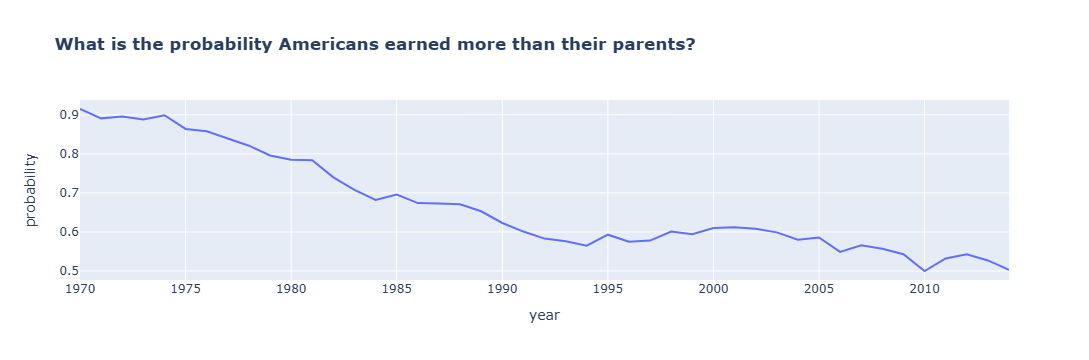

In [26]:
plot_timeseries(
    data=kids, 
    y='probability', 
    x='cohort_work_year', 
    yaxis_title='probability', 
    xaxis_title='year', 
    title='What is the probability Americans earned more than their parents?',
)

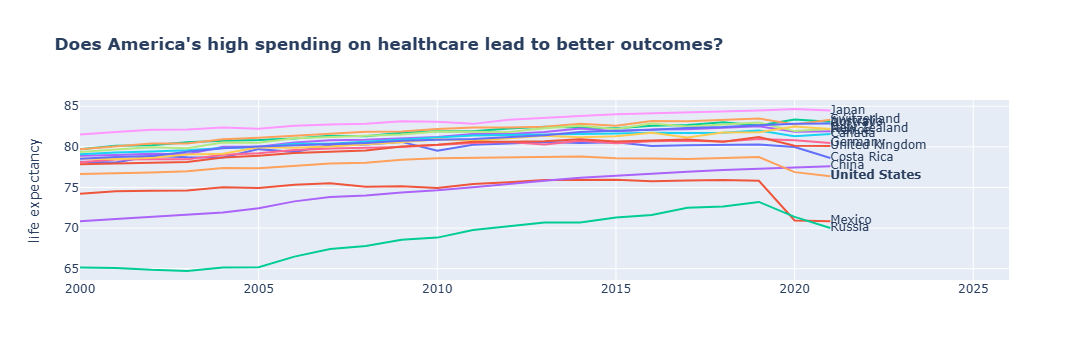

In [110]:
plot_timeseries_multiple_countries(data=life, title="Does America's high spending on healthcare lead to better outcomes?", yaxis_title="life expectancy")
